In [113]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

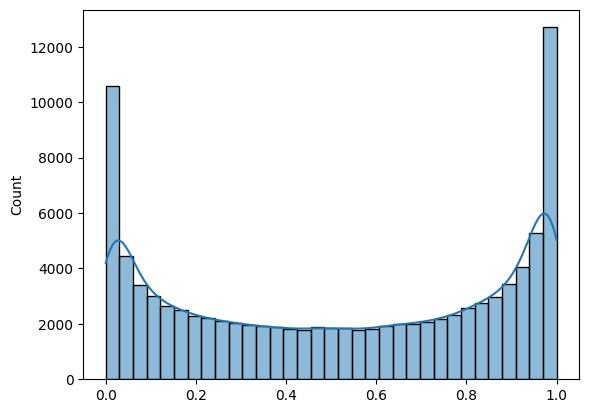

In [265]:
# Создаем переменную: которая будет иметь распределение, похожее на данные
z = (np.sin(np.random.lognormal(2,1,size=100000))+1)/2
sns.histplot(z, kde=True);

In [267]:
# Симулируем АА и АБ тесты
p_value_1 = [] # для ттеста
p_value_2 = [] # для манна-витни
type_one_error_1 = []
type_one_error_2 = []
power_1 = []
power_2 = []
alpha = 0.05


for i in range(1000):
    sample = np.random.choice(z, size=50000, replace=False)
    test = sample[:5000]
    control = sample[5000:]
    p_1 = stats.ttest_ind(test, control, equal_var=False)[1]
    p_value_1.append(p_1)
    type_one_error_1.append(p_1<=alpha)
    p_2 = stats.mannwhitneyu(test, control, alternative = 'two-sided')[1]
    p_value_2.append(p_2)
    type_one_error_2.append(p_2<=alpha)
    test2 = np.sin(1+np.random.lognormal(0,1,len(control))) # распределние для АБ теста, когда есть эффект. 
    # Просто добавить MDE для такой задачи кажется неправильным, потому что данные предполагают распределение от 0 до 1 и скорее всего
    # наличие эффекта означает, что у нас больше разметки 1
    

    power_1.append(stats.ttest_ind(test2, control, equal_var=False)[1]<=0.05)
    power_2.append(stats.mannwhitneyu(test2, control, alternative='two-sided')[1]<=0.05)
    




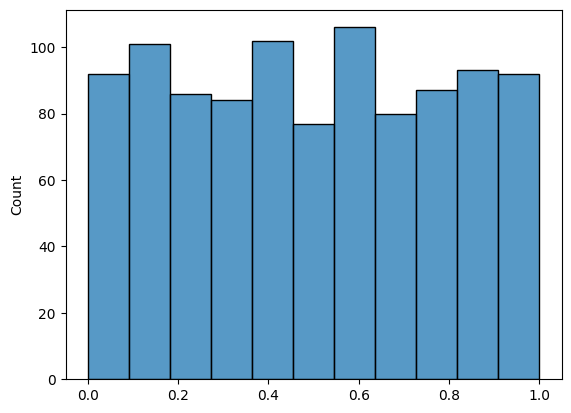

In [268]:
# Проверяем, что p-value равномерно распределены
sns.histplot(p_value_1);

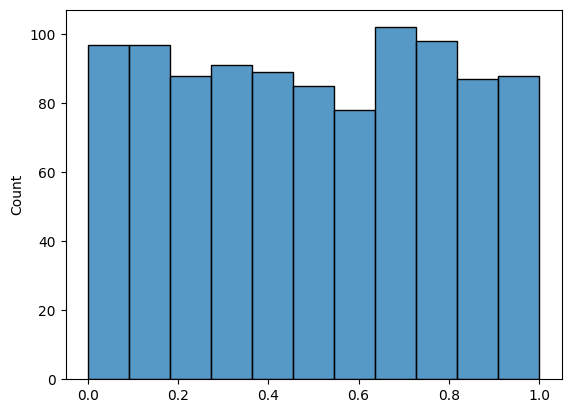

In [269]:
sns.histplot(p_value_2);

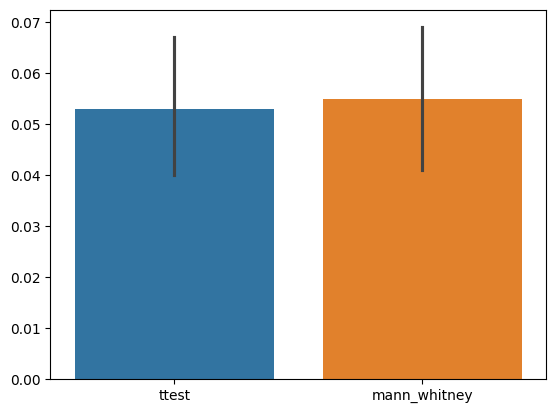

In [270]:
data_one = pd.DataFrame({'ttest':np.array(type_one_error_1, dtype=int), 'mann_whitney':np.array(type_one_error_2, dtype=int)})
sns.barplot(data_one);

Собственно видно, что оба критерия корректны, доверительные интервалы покрывают 0.05, ошибка первого рода выдерживается

In [271]:
data_two = pd.DataFrame({'ttest':np.array(power_1, dtype=int), 'mann_whitney':np.array(power_2, dtype=int)})

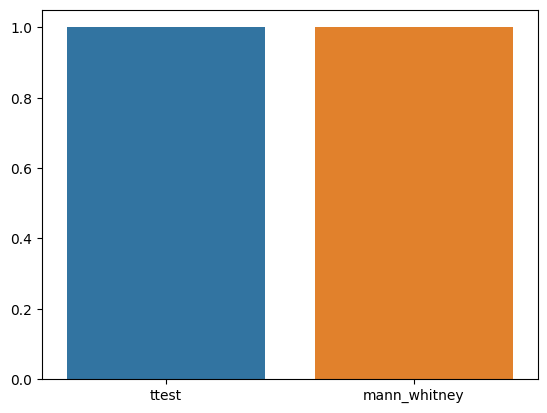

In [272]:
sns.barplot(data_2);

Мощности получились 1 у обоих критериев, потому что я брала очень большие выборки. Можно сравнить критерии по мощности при росте выборок.

In [ ]:
for i in range(40000):
    control = np.random.choice(z,size=i, replace=False)
    test = np.sin((1+np.random.lognormal(0,1,len(control))))
    p_value_t = stats.
